### STROKE PREDICTION

#### PROBLEM STATEMENT

In this project, we are going to bulid a predictive model to predict whether a patient is likely to get stroke based on the input parameters provided.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
spd = pd.read_csv("healthcare-dataset-stroke-data.csv")

#### DATA DESCRIPTION

The dataset contains 5110 observations with 12 attributes. 

Target Variable : stroke

Predictor Variable : gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status.

Attribute Information:

1) id                  : unique identifier

2) gender              : "Male", "Female" or "Other"

3) age                 : age of the patient

4) hypertension        : 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease       : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married        : "No" or "Yes"

7) work_type           : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type      : "Rural" or "Urban"

9) avg_glucose_level   : average glucose level in blood

10) bmi                : body mass index

11) smoking_status     : "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke             : 1 if the patient had a stroke or 0 if not

In [165]:
spd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never smoked,1


In [166]:
spd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [163]:
for col in spd.columns:
    print(spd[col].value_counts())
    print("-"*30)

49152    1
21785    1
25982    1
5500     1
28027    1
        ..
45759    1
4795     1
47802    1
49849    1
16380    1
Name: id, Length: 5110, dtype: int64
------------------------------
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------------
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
------------------------------
0    4612
1     498
Name: hypertension, dtype: int64
------------------------------
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------------
Private          2925
Self_employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------

#### DATA VISUALIZATION

C:\Users\Zenith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


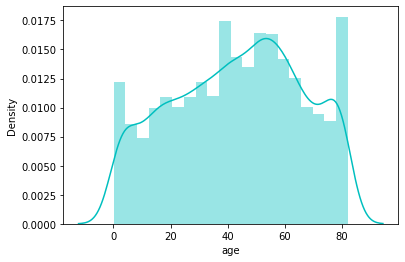

In [191]:
sns.distplot(spd['age'], color='c')
plt.show()

C:\Users\Zenith\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


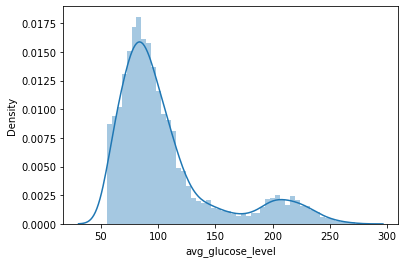

In [193]:
sns.distplot(spd['avg_glucose_level'])
plt.show()

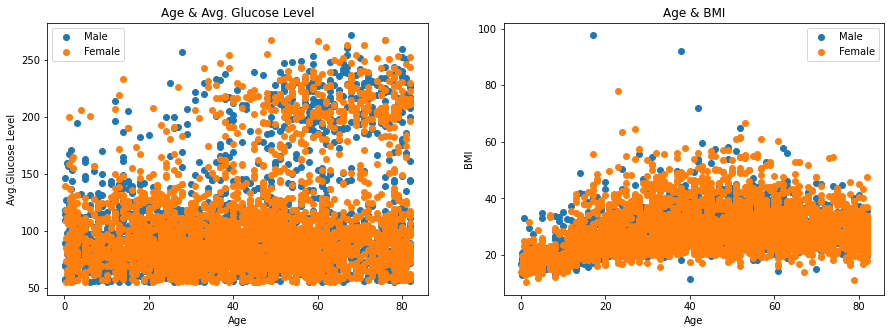

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
for gender in ['Male','Female']:
    plt.scatter(spd[spd.gender == gender].age, 
                spd[spd.gender == gender].avg_glucose_level, label =gender)    
plt.xlabel('Age')
plt.ylabel('Avg.Glucose Level')
plt.title('Age & Avg. Glucose Level')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Age & BMI')
for gender in ['Male', 'Female']:
    plt.scatter(spd[spd.gender == gender].age, 
                spd[spd.gender == gender].bmi,label = gender)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

When Age & Avg. Glucose Level is examined, the "Avg. Glucose Level" value increases in the 40-80 age range for women and men. 

When Age & BMI is examined, the BMI value increases in individuals over the age of 20. It is seen that BMI is concentrated between 20-40 values in the 20-80 age range. 

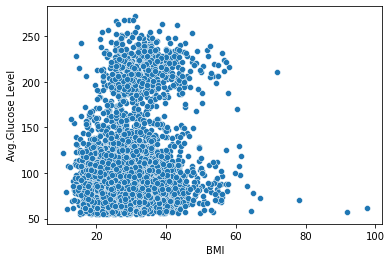

In [198]:
sns.scatterplot(x=spd['bmi'], y=spd['avg_glucose_level'])
plt.xlabel('BMI')
plt.ylabel('Avg.Glucose Level')
plt.show()

When BMI & Avg. Glucose Level is examined, it is seen that "Avg. Glucose Level" value is concentrated between 50-150 when BMI is between 20-40, and "Avg. Glucose Level" value is slightly more intense between 0-150 and 150-250 when BMI is between 40-60.

In [6]:
a = ((spd['stroke'] == 0 ) & (spd['gender'] == 'Male'))
b = ((spd['stroke'] == 1 ) & (spd['gender'] == 'Male'))
c = ((spd['stroke'] == 0 ) & (spd['gender'] == 'Female'))
d = ((spd['stroke'] == 1 ) & (spd['gender'] == 'Female'))
e = ((spd['stroke'] == 0 ) & (spd['gender'] == 'Other'))
f = ((spd['stroke'] == 1 ) & (spd['gender'] == 'Other'))

In [8]:
spd[a]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
260,64908,Male,79.0,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0
264,25774,Male,35.0,0,0,No,Private,Rural,85.37,33.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self_employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self_employed,Rural,71.97,28.3,never smoked,0


In [4]:
a1=len(spd[a].iloc[ : ,1].tolist())
b1=len(spd[b].iloc[ : ,1].tolist())
c1=len(spd[c].iloc[ : ,1].tolist())
d1=len(spd[d].iloc[ : ,1].tolist())
e1=len(spd[e].iloc[ : ,1].tolist())
f1=len(spd[f].iloc[ : ,1].tolist())
gender=[a1,b1,c1,d1,e1,f1]
A = np.reshape(gender, (3,2))
df1=pd.DataFrame(A, index=['Male', 'Female', 'Other'],columns=pd.Index(['no', 'yes'], name='Stroke'))

a = ((spd['stroke'] == 0 ) & (spd['hypertension'] == 0))
b = ((spd['stroke'] == 1 ) & (spd['hypertension'] == 0))
c = ((spd['stroke'] == 0 ) & (spd['hypertension'] == 1))
d = ((spd['stroke'] == 1 ) & (spd['hypertension'] == 1))
a1=len(spd[a].iloc[ : ,3].tolist())
b1=len(spd[b].iloc[ : ,3].tolist())
c1=len(spd[c].iloc[ : ,3].tolist())
d1=len(spd[d].iloc[ : ,3].tolist())
gender=[a1,b1,c1,d1]
B = np.reshape(gender, (2,2))
df2=pd.DataFrame(B, index=["0", "1"],columns=pd.Index(['no', 'yes'], name='Stroke'))

a = ((spd['stroke'] == 0 ) & (spd['heart_disease'] == 0))
b = ((spd['stroke'] == 1 ) & (spd['heart_disease'] == 0))
c = ((spd['stroke'] == 0 ) & (spd['heart_disease'] == 1))
d = ((spd['stroke'] == 1 ) & (spd['heart_disease'] == 1))
a1=len(spd[a].iloc[ : ,4].tolist())
b1=len(spd[b].iloc[ : ,4].tolist())
c1=len(spd[c].iloc[ : ,4].tolist())
d1=len(spd[d].iloc[ : ,4].tolist())
gender=[a1,b1,c1,d1]
C = np.reshape(gender, (2,2))
df3=pd.DataFrame(C, index=["0", "1"],columns=pd.Index(['no', 'yes'], name='Stroke'))

a = ((spd['stroke'] == 0 ) & (spd['ever_married'] == 'Yes'))
b = ((spd['stroke'] == 1 ) & (spd['ever_married'] == 'Yes'))
c = ((spd['stroke'] == 0 ) & (spd['ever_married'] == 'No'))
d = ((spd['stroke'] == 1 ) & (spd['ever_married'] == 'No'))
a1=len(spd[a].iloc[ : ,5].tolist())
b1=len(spd[b].iloc[ : ,5].tolist())
c1=len(spd[c].iloc[ : ,5].tolist())
d1=len(spd[d].iloc[ : ,5].tolist())
ever_married=[a1,b1,c1,d1]
D = np.reshape(ever_married, (2,2))
df4=pd.DataFrame(D, index=["Yes", "No"],columns=pd.Index(['no', 'yes'], name='Stroke'))

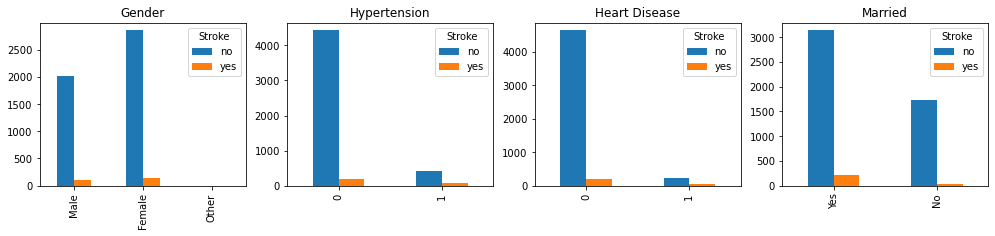

In [180]:
fig, axes = plt.subplots(figsize=(17,3),nrows=1, ncols=4)
df1.plot(ax=axes[0], kind='bar', title='Gender')
df2.plot(ax=axes[1], kind='bar', title='Hypertension')
df3.plot(ax=axes[2], kind='bar', title='Heart Disease')
df4.plot(ax=axes[3], kind='bar', title='Married');

From the above-related graphs on Gender, Hypertension, Heart Disease, Marriage, we can examine that the proportion between the bars seems to have some relation between some features and stroke probability.

In [184]:
a = ((spd['stroke'] == 0 ) & (spd['smoking_status'] == 'formerly smoked'))
b = ((spd['stroke'] == 1 ) & (spd['smoking_status'] == 'formerly smoked'))
c = ((spd['stroke'] == 0 ) & (spd['smoking_status'] == 'never smoked'))
d = ((spd['stroke'] == 1 ) & (spd['smoking_status'] == 'never smoked'))
e = ((spd['stroke'] == 0 ) & (spd['smoking_status'] == 'smokes'))
f = ((spd['stroke'] == 1 ) & (spd['smoking_status'] == 'smokes'))
g = ((spd['stroke'] == 0 ) & (spd['smoking_status'] == 'Unknown'))
h = ((spd['stroke'] == 1 ) & (spd['smoking_status'] == 'Unknown'))
a1=len(spd[a].iloc[ : ,-2].tolist())
b1=len(spd[b].iloc[ : ,-2].tolist())
c1=len(spd[c].iloc[ : ,-2].tolist())
d1=len(spd[d].iloc[ : ,-2].tolist())
e1=len(spd[e].iloc[ : ,-2].tolist())
f1=len(spd[f].iloc[ : ,-2].tolist())
g1=len(spd[g].iloc[ : ,-2].tolist())
h1=len(spd[h].iloc[ : ,-2].tolist())
smoking_status=[a1,b1,c1,d1,e1,f1,g1,h1]
A = np.reshape(smoking_status, (4,2))
df1=pd.DataFrame(A, index=['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
                 columns=pd.Index(['no', 'yes'], name='Stroke'))

a = ((spd['stroke'] == 0 ) & (spd['work_type'] == 'Private'))
b = ((spd['stroke'] == 1 ) & (spd['work_type'] == 'Private'))
c = ((spd['stroke'] == 0 ) & (spd['work_type'] == 'Self_employed'))
d = ((spd['stroke'] == 1 ) & (spd['work_type'] == 'Self_employed'))
e = ((spd['stroke'] == 0 ) & (spd['work_type'] == 'Govt_job'))
f = ((spd['stroke'] == 1 ) & (spd['work_type'] == 'Govt_job'))
g = ((spd['stroke'] == 0 ) & (spd['work_type'] == 'children'))
h = ((spd['stroke'] == 1 ) & (spd['work_type'] == 'children'))
i = ((spd['stroke'] == 0 ) & (spd['work_type'] == 'Never_worked'))
j = ((spd['stroke'] == 1 ) & (spd['work_type'] == 'Never_worked'))
a1=len(spd[a].iloc[ : ,6].tolist())
b1=len(spd[b].iloc[ : ,6].tolist())
c1=len(spd[c].iloc[ : ,6].tolist())
d1=len(spd[d].iloc[ : ,6].tolist())
e1=len(spd[e].iloc[ : ,6].tolist())
f1=len(spd[f].iloc[ : ,6].tolist())
g1=len(spd[g].iloc[ : ,6].tolist())
h1=len(spd[h].iloc[ : ,6].tolist())
i1=len(spd[i].iloc[ : ,6].tolist())
j1=len(spd[j].iloc[ : ,6].tolist())
work_type=[a1,b1,c1,d1,e1,f1,g1,h1,i1,j1]
B = np.reshape(work_type, (5,2))
df2=pd.DataFrame(B, index=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
                 columns=pd.Index(['no', 'yes'], name='Stroke'))

a = ((spd['stroke'] == 0 ) & (spd['Residence_type'] == 'Urban'))
b = ((spd['stroke'] == 1 ) & (spd['Residence_type'] == 'Urban'))
c = ((spd['stroke'] == 0 ) & (spd['Residence_type'] == 'Rural'))
d = ((spd['stroke'] == 1 ) & (spd['Residence_type'] == 'Rural'))
a1=len(spd[a].iloc[ : ,7].tolist())
b1=len(spd[b].iloc[ : ,7].tolist())
c1=len(spd[c].iloc[ : ,7].tolist())
d1=len(spd[d].iloc[ : ,7].tolist())
Residence_type=[a1,b1,c1,d1]
C = np.reshape(Residence_type, (2,2))
df3=pd.DataFrame(C, index=['Urban','Rural'],columns=pd.Index(['no', 'yes'], name='Stroke'))

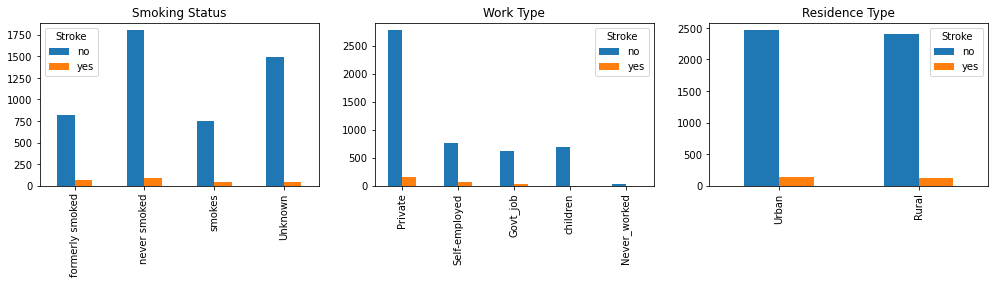

In [185]:
fig, axes = plt.subplots(figsize=(17,3),nrows=1, ncols=3)
df1.plot(ax=axes[0], kind='bar', title='Smoking Status')
df2.plot(ax=axes[1], kind='bar', title='Work Type')
df3.plot(ax=axes[2], kind='bar', title='Residence Type');

From the plots above, it looks like there isn't any significant relation between stroke probability and the features.

#### DATA CLEANING

In [203]:
spd.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [86]:
spd.bmi = spd.bmi.fillna(spd.bmi.mean())

In [87]:
spd.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
spd.gender.replace({"Male":1, "Female":0, "Other":-1} ,inplace = True)
spd.ever_married.replace({"No":0 , "Yes":1 }, inplace = True)
spd.work_type.replace({"children":0, "Never_worked":1, "Self_employed":2 , "Private" :-1, 
                       "Govt_job":-2 }, inplace = True)
spd.Residence_type.replace({"Urban":0, "Rural":1}, inplace = True)
spd.smoking_status.replace({"Unknown":0, "never smoked":1, "formerly smoked":2, "smokes":-1}, inplace = True)

In [90]:
spd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,-1,0,228.69,36.600000,2,1
1,51676,0,61.0,0,0,1,2,1,202.21,28.893237,1,1
2,31112,1,80.0,0,1,1,-1,1,105.92,32.500000,1,1
3,60182,0,49.0,0,0,1,-1,0,171.23,34.400000,-1,1
4,1665,0,79.0,1,0,1,2,1,174.12,24.000000,1,1


#### SPLITTING THE DATA INTO TRAIN AND TEST DATASETS

In [91]:
spd_x = spd.iloc[: , 1:11]
spd_y = spd.iloc[: , -1]

In [92]:
from sklearn.model_selection import train_test_split
spd_x_train, spd_x_test, spd_y_train , spd_y_test  =  train_test_split( spd_x , spd_y , test_size = .2 , 
                                                                       random_state = 101)

In [93]:
print(spd.shape)

(5110, 12)


In [94]:
print(spd_x_train.shape)
print(spd_y_train.shape)

(4088, 10)
(4088,)


In [95]:
print(spd_x_test.shape)
print(spd_y_test.shape)

(1022, 10)
(1022,)


#### MACHINE LEARNING ALGORITHM USED RANDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc = RandomForestClassifier(n_estimators = 500)

In [98]:
rfc.fit(spd_x_train, spd_y_train)

RandomForestClassifier(n_estimators=500)

In [99]:
pred_rf_test=rfc.predict(spd_x_test )
pred_rf_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
len(pred_rf_test)

1022

In [101]:
pred_rf_test.reshape(73,14).tolist()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0,

In [102]:
pred_actual = pd.DataFrame( {"Actual_Values" :spd_y_test, "Predicted_Value" : pred_rf_test } )
pred_actual.head(50)

,Actual_Values,Predicted_Value
5031,0,0
4017,0,0
744,0,0
1799,0,0
2314,0,0
2039,0,0
1500,0,0
2422,0,0
257,0,0
5084,0,0


#### MODEL EVALUATION - CONFUSION MATRIX

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
pred_rf_train=rfc.predict(spd_x_train )
tab1 = confusion_matrix(pred_rf_train , spd_y_train)
print(tab1)

[[3893    0]
 [   0  195]]


In [105]:
print("Accuracy on training set: ",(tab1.diagonal().sum() / tab1.sum() * 100))

Accuracy on training set:  100.0


In [106]:
tab2 = confusion_matrix(pred_rf_test , spd_y_test)
print(tab2)

[[968  54]
 [  0   0]]


In [107]:
print("Accuracy on test set: ",(tab2.diagonal().sum() / tab2.sum() * 100))

Accuracy on test set:  94.71624266144813


#### FEATURE IMPORTANCES

In [108]:
rfc.feature_importances_

array([0.03188315, 0.2275967 , 0.0265168 , 0.02446593, 0.01814672,
       0.0479874 , 0.03495644, 0.29145392, 0.23049985, 0.06649309])

In [109]:
feature_score = pd.DataFrame({"Importance" : rfc.feature_importances_ ,
                              " Variable_Name" : spd_x_train.columns})
feature_score

,Importance,Variable_Name
0,0.031883,gender
1,0.227597,age
2,0.026517,hypertension
3,0.024466,heart_disease
4,0.018147,ever_married
5,0.047987,work_type
6,0.034956,Residence_type
7,0.291454,avg_glucose_level
8,0.230500,bmi
9,0.066493,smoking_status


In [76]:
feature_score.sort_values(['Importance'] , ascending = False )

,Importance,Variable_Name
7,0.289967,avg_glucose_level
1,0.230556,age
8,0.230472,bmi
9,0.065499,smoking_status
5,0.048331,work_type
6,0.034821,Residence_type
0,0.032653,gender
2,0.025599,hypertension
3,0.023893,heart_disease
4,0.018208,ever_married


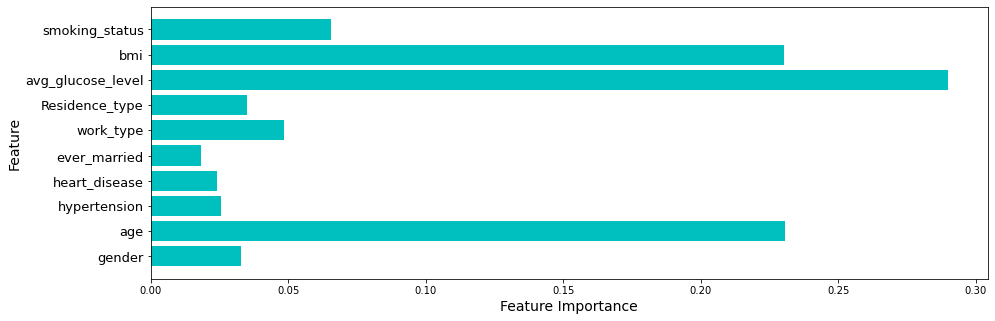

In [77]:
plt.figure(figsize=(15,5))
plt.barh(spd_x_train.columns,rfc.feature_importances_ , color='c')
plt.xlabel("Feature Importance", size=14)
plt.ylabel("Feature", size=14)
plt.yticks(fontsize=13)
plt.show()

In [2]:
from numpy import nan as NA 
import pandas as pd
data = pd.Series([1, NA, 3.5, NA, 7]) 


In [3]:
data.fillna(0)


0    1.0
1    0.0
2    3.5
3    0.0
4    7.0
dtype: float64

In [11]:
 data = pd.DataFrame({'k1': ['one', 'two']  + ['two']})

In [12]:
data

,k1
0,one
1,two
2,two


In [13]:
data.duplicated()

0    False
1    False
2     True
dtype: bool

In [14]:
data.drop_duplicates()

,k1
0,one
1,two


In [17]:
data = pd.Series(["zero","two","three"])
data

0     zero
1      two
2    three
dtype: object

In [18]:
data.replace("zero","one")

0      one
1      two
2    three
dtype: object

In [23]:
df = pd.DataFrame({'key': ['c', 'b', 'b', 'a'],'data': range(4)})

In [24]:
pd.get_dummies(df['key'])

,a,b,c
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
